# Model `MessagePassing`

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : 2
[I] seed         : 1997
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


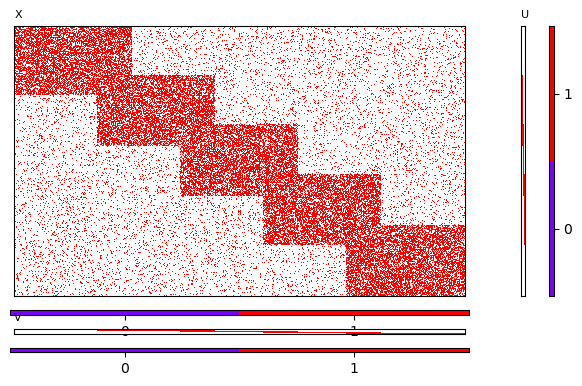

<Figure size 640x480 with 0 Axes>

In [3]:
from generators import BlockDiagonalMatrixGenerator

data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.3])
data.generate(seed=1997)

data.add_noise(noise=[0.4, 0.1], seed=2000)
data.show_matrix(scaling=0.4)

In [13]:
from datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


In [14]:
from datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

split = NoSplit(X=data.X)

# split.negative_sample(size=split.pos_size, type="popularity", seed=2023)

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1720474500
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1720474500


[I] k            : 5
[I] W            : full
[I] prior_u      : 0.5
[I] prior_v      : 0.5
[I] channel_pos  : 0.99
[I] channel_neg  : 0.99
[I] tol          : 0.0001
[I] max_iter     : 500
[I] lr           : 0.2
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] verbose      : True
[I] Missing validation data.
[W] Missing testing data.


[I] diff: 3.907453: 100%|██████████| 500/500 [00:49<00:00, 10.00it/s]


[W] Timer not started.
[I] model saved as: 24-07-09_05-37-41_MessagePassing.pickle


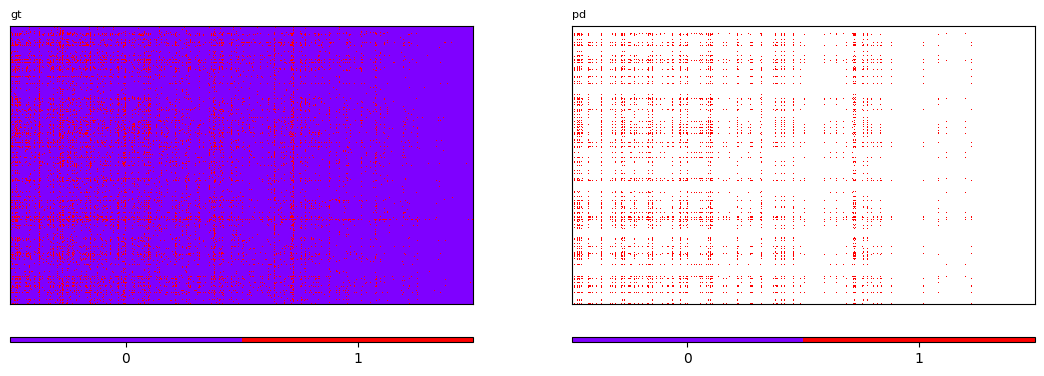

train                             
                            0                             
                time   Recall Precision Accuracy        F1
0  09/07/24 05:37:41  0.33104  0.724166    0.943  0.454371

<Figure size 640x480 with 0 Axes>

: 

In [16]:
from models import MessagePassing

k = 5
W = 'full'

model = MessagePassing(k=k, W=W)
model.fit(X_train=X_train, task='reconstruction', verbose=True)